In [3]:
# Install the packages
!pip install -U -q PyDrive
!pip install keras

     |████████████████████████████████| 993kB 5.0MB/s 


In [7]:
# Import packages
import os
import keras
import numpy as np
from google.colab import auth
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from oauth2client.client import GoogleCredentials
from keras.applications.resnet50 import preprocess_input, decode_predictions

# Mount data from Google drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
google_auth = GoogleAuth()
google_auth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(google_auth)

In [2]:
# Data packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Image manipulation
from PIL import Image

# Other system packages
import os

# Keras functions 
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Activation, Flatten, MaxPool2D, BatchNormalization, Input
from keras.optimizers import Adam, SGD, Adadelta
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Dropout




from keras.applications import VGG19
from keras.layers import Flatten, Input
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential, Model
from keras.utils import np_utils
from keras.initializers import Constant
from keras.regularizers import l2
from keras import backend as K

# sklearn functions
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# Import Keras Applications
from keras.applications.resnet50 import ResNet50


Using TensorFlow backend.


In [0]:
def load_mnist(path, kind='train'):
   import os
   import gzip
   import numpy as np

   """Load MNIST data from `path`"""
   labels_path = os.path.join(path,
                              '%s-labels-idx1-ubyte.gz'
                              % kind)
   images_path = os.path.join(path,
                              '%s-images-idx3-ubyte.gz'
                              % kind)

   with gzip.open(labels_path, 'rb') as lbpath:
       labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                              offset=8)

   with gzip.open(images_path, 'rb') as imgpath:
       images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                              offset=16).reshape(len(labels), 784)

   return images, labels

In [0]:

X_train, y_train = load_mnist('gdrive/My Drive/data/fashion', kind='train')
X_test, y_test = load_mnist('gdrive/My Drive/data/fashion', kind='t10k')

y_train = y_train.reshape(y_train.shape[0], 1)
y_test = y_test.reshape(y_test.shape[0], 1)




In [5]:
## Reshapes the data sets
print("Shape of X_train is :",X_train.shape)
print("Shape of Y_train is :",y_train.shape)
print("Shape of X_test is :",X_test.shape)
print("Shape of Y_test is :",y_test.shape)

Shape of X_train is : (60000, 784)
Shape of Y_train is : (60000, 1)
Shape of X_test is : (10000, 784)
Shape of Y_test is : (10000, 1)


In [0]:
im_rows = 28
im_cols = 28
batch_size = 512 
im_shape = (im_rows, im_cols, 1)

In [7]:

X_train = X_train.reshape(X_train.shape[0], *im_shape)
X_test = X_test.reshape(X_test.shape[0], *im_shape)

print('X_train shape:{}'.format(X_train.shape))
print('X_test shape:{}'.format(X_test.shape))


X_train shape:(60000, 28, 28, 1)
X_test shape:(10000, 28, 28, 1)


In [8]:
X_train = np.pad(X_train,((0,0),(2,2),(2,2),(1,1)), mode='constant', constant_values=0)
X_test = np.pad(X_test,((0,0),(2,2),(2,2),(1,1)), mode='constant', constant_values=0)
X_train = np.stack(X_train*3)
X_test = np.stack(X_test*3)
print('X_train shape:{}'.format(X_train.shape))
print('X_test shape:{}'.format(X_test.shape))

X_train shape:(60000, 32, 32, 3)
X_test shape:(10000, 32, 32, 3)


In [106]:
from keras.models import Model
from keras.applications.resnet50 import ResNet50
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K

# Load the ResNet50 model with pre-trained weights. 
# Do not include fully connected layers as num of classes in 
# Mnist fashion dataset is 10 and the model was trained for 50 classes
base_Model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [0]:
# Add a global spatial average pooling layer
X = base_Model.output
X = GlobalAveragePooling2D()(X)

# Fully-connected layer
X = Dense(512, activation='relu')(X)

# Fully connected output/classification layer
predictions = Dense(10, activation='softmax')(X)

# Freeze all layers of the ResNet50 model
for layer in base_Model.layers:
   layer.trainable = False

In [109]:
# full network with the new layers
base_Model_transfer = Model(input=base_Model.input, output=predictions)

# model compilation
base_Model_transfer.compile(loss='sparse_categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """Entry point for launching an IPython kernel.


In [110]:
#Model training
history = base_Model_transfer.fit(X_train, y_train,
        batch_size=32, epochs=20,
        validation_split=0.2,
        verbose=1, shuffle=True)


Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 37s 772us/step - loss: 0.9612 - acc: 0.6577 - val_loss: 4.9134 - val_acc: 0.1858
Epoch 2/20
48000/48000 [==============================] - 25s 511us/step - loss: 0.7976 - acc: 0.7043 - val_loss: 3.4811 - val_acc: 0.2845
Epoch 3/20
48000/48000 [==============================] - 25s 516us/step - loss: 0.7609 - acc: 0.7158 - val_loss: 4.4920 - val_acc: 0.2195
Epoch 4/20
48000/48000 [==============================] - 25s 518us/step - loss: 0.7344 - acc: 0.7261 - val_loss: 4.8014 - val_acc: 0.2438
Epoch 5/20
48000/48000 [==============================] - 24s 509us/step - loss: 0.7179 - acc: 0.7312 - val_loss: 4.6729 - val_acc: 0.2613
Epoch 6/20
48000/48000 [==============================] - 24s 509us/step - loss: 0.6966 - acc: 0.7426 - val_loss: 4.7965 - val_acc: 0.2507
Epoch 7/20
48000/48000 [==============================] - 25s 524us/step - loss: 0.6752 - acc: 0.7471 - val_loss: 3.

In [89]:
# model evaluation
score = base_Model_transfer.evaluate(X_test, y_test)
print('Accuracy on test set: {}'.format(score))

for layer in base_Model_transfer.layers[176:]:
   layer.trainable = False


10000/10000 [==============================] - 4s 398us/step
Accuracy on test set: [6.441197744750976, 0.2009]


In [0]:
#Model compilation
base_Model_transfer.compile(loss='sparse_categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])


In [112]:

# Model training
history = base_Model_transfer.fit(X_train, y_train,
        batch_size=32, epochs=20,
        validation_split=0.2,
        verbose=1, shuffle=True)

base_Model_transfer.summary()

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 37s 770us/step - loss: 0.5965 - acc: 0.7797 - val_loss: 5.5687 - val_acc: 0.1817
Epoch 2/20
48000/48000 [==============================] - 24s 510us/step - loss: 0.5794 - acc: 0.7886 - val_loss: 6.0344 - val_acc: 0.2068
Epoch 3/20
48000/48000 [==============================] - 24s 509us/step - loss: 0.5775 - acc: 0.7874 - val_loss: 5.1180 - val_acc: 0.2114
Epoch 4/20
48000/48000 [==============================] - 25s 521us/step - loss: 0.5732 - acc: 0.7903 - val_loss: 6.1461 - val_acc: 0.1971
Epoch 5/20
48000/48000 [==============================] - 24s 507us/step - loss: 0.5670 - acc: 0.7907 - val_loss: 5.8857 - val_acc: 0.1908
Epoch 6/20
48000/48000 [==============================] - 24s 506us/step - loss: 0.5689 - acc: 0.7910 - val_loss: 6.2694 - val_acc: 0.2052
Epoch 7/20
48000/48000 [==============================] - 25s 518us/step - loss: 0.5613 - acc: 0.7949 - val_loss: 6.

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


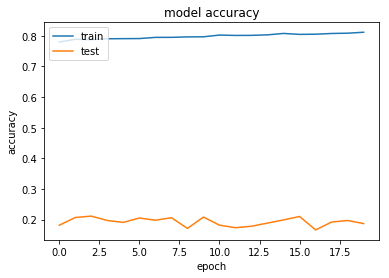

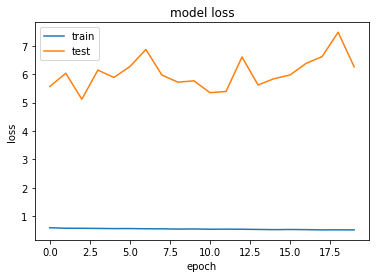

In [114]:
# list all data in history
print(base_Model_transfer.history.history.keys())
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [0]:
# Imports the data 

X_train, y_train = load_mnist('gdrive/My Drive/data/fashion', kind='train')
X_test, y_test = load_mnist('gdrive/My Drive/data/fashion', kind='t10k')

y_train = y_train.reshape(y_train.shape[0], 1)
y_test = y_test.reshape(y_test.shape[0], 1)

shape = (28, 28, 1) # Target shape
X_train = X_train.reshape(X_train.shape[0], *shape)
X_test = X_test.reshape(X_test.shape[0],*shape)


In [147]:
# Custom CNN model with 7 layers
custom_CNN = Sequential()
custom_CNN.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[28,28,1], name='Conv2D-1'))
custom_CNN.add(Conv2D(filters=128, kernel_size=3, activation='relu', name='Conv2D-2'))
custom_CNN.add(MaxPooling2D(pool_size=2, name='MaxPool'))
custom_CNN.add(Conv2D(filters=128, kernel_size=3, activation='relu', name='Conv2D-3'))
custom_CNN.add(Dropout(0.25, name='Dropout-1'))
custom_CNN.add(Flatten(name='flatten'))
custom_CNN.add(Dense(10, activation='softmax', name='Output'))
custom_CNN.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam', metrics=['accuracy'])
custom_CNN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D-1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
Conv2D-2 (Conv2D)            (None, 24, 24, 128)       36992     
_________________________________________________________________
MaxPool (MaxPooling2D)       (None, 12, 12, 128)       0         
_________________________________________________________________
Conv2D-3 (Conv2D)            (None, 10, 10, 128)       147584    
_________________________________________________________________
Dropout-1 (Dropout)          (None, 10, 10, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 12800)             0         
_________________________________________________________________
Output (Dense)               (None, 10)                128010    
Total para

In [0]:
#Model compilation
custom_CNN.compile(loss='sparse_categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

In [138]:

# Model training
custom_CNN_history = custom_CNN.fit(X_train, y_train,
        batch_size=32, epochs=20,
        validation_split=0.2,
        verbose=1, shuffle=True)

custom_CNN.summary()

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 25s 531us/step - loss: 12.9891 - acc: 0.1939 - val_loss: 12.9254 - val_acc: 0.1981
Epoch 2/20
48000/48000 [==============================] - 15s 305us/step - loss: 13.4135 - acc: 0.1678 - val_loss: 14.5331 - val_acc: 0.0983
Epoch 3/20
48000/48000 [==============================] - 14s 298us/step - loss: 14.4996 - acc: 0.1004 - val_loss: 14.5331 - val_acc: 0.0983
Epoch 4/20
48000/48000 [==============================] - 13s 281us/step - loss: 14.4992 - acc: 0.1004 - val_loss: 14.5331 - val_acc: 0.0983
Epoch 5/20
48000/48000 [==============================] - 13s 280us/step - loss: 14.4996 - acc: 0.1004 - val_loss: 14.5331 - val_acc: 0.0983
Epoch 6/20
48000/48000 [==============================] - 14s 291us/step - loss: 14.4996 - acc: 0.1004 - val_loss: 14.5331 - val_acc: 0.0983
Epoch 7/20
48000/48000 [==============================] - 13s 281us/step - loss: 14.4992 - acc: 0.1004 -

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


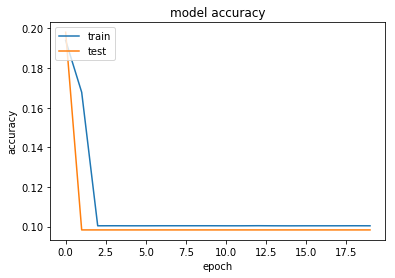

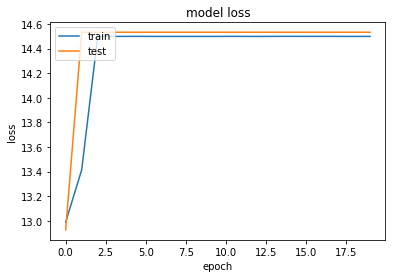

In [139]:
# list all data in history
print(custom_CNN_history.history.keys())
# list all data in history
print(custom_CNN_history.history.keys())
# summarize history for accuracy
plt.plot(custom_CNN_history.history['acc'])
plt.plot(custom_CNN_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(custom_CNN_history.history['loss'])
plt.plot(custom_CNN_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [0]:
#Model compilation with SGD optimiser
custom_CNN.compile(loss='sparse_categorical_crossentropy',
            optimizer='SGD',
            metrics=['accuracy'])

In [152]:
# Model training
custom_CNN_history = custom_CNN.fit(X_train, y_train,
        batch_size=20, epochs=12,
        validation_split=0.2,
        verbose=1, shuffle=True)

custom_CNN.summary()

Train on 48000 samples, validate on 12000 samples
Epoch 1/12
48000/48000 [==============================] - 21s 430us/step - loss: 14.5043 - acc: 0.1001 - val_loss: 14.5143 - val_acc: 0.0995
Epoch 2/12
48000/48000 [==============================] - 20s 426us/step - loss: 14.5043 - acc: 0.1001 - val_loss: 14.5143 - val_acc: 0.0995
Epoch 3/12
48000/48000 [==============================] - 21s 445us/step - loss: 14.5043 - acc: 0.1001 - val_loss: 14.5143 - val_acc: 0.0995
Epoch 4/12
48000/48000 [==============================] - 22s 459us/step - loss: 14.5043 - acc: 0.1001 - val_loss: 14.5143 - val_acc: 0.0995
Epoch 5/12
48000/48000 [==============================] - 20s 427us/step - loss: 14.5043 - acc: 0.1001 - val_loss: 14.5143 - val_acc: 0.0995
Epoch 6/12
48000/48000 [==============================] - 20s 425us/step - loss: 14.5043 - acc: 0.1001 - val_loss: 14.5143 - val_acc: 0.0995
Epoch 7/12
48000/48000 [==============================] - 21s 447us/step - loss: 14.5043 - acc: 0.1001 -

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


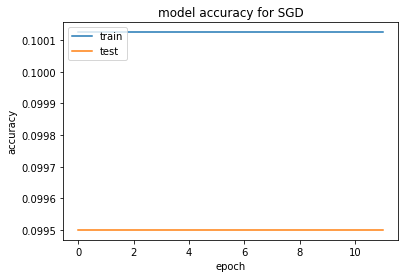

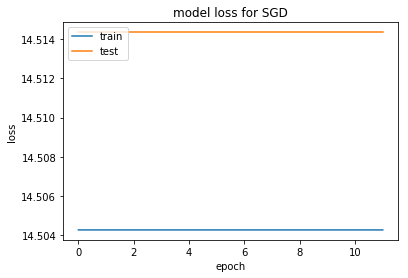

In [156]:
# list all data in history
print(custom_CNN_history.history.keys())
# list all data in history
print(custom_CNN_history.history.keys())
# summarize history for accuracy
plt.plot(custom_CNN_history.history['acc'])
plt.plot(custom_CNN_history.history['val_acc'])
plt.title('model accuracy for SGD')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(custom_CNN_history.history['loss'])
plt.plot(custom_CNN_history.history['val_loss'])
plt.title('model loss for SGD')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()